# Case Study 1: Classification of Fashion MNIST Data

## **Objective**

### The purpose of this assignm is to a analyze and compare the performace of various classification algorithms on the Fashion MNIST dataset The assignmnet is split into two parts:

1. Binary Classification: Distinguish between two specific classes.
2. Multi-Class Classification: Classify images into all 10 categories.

We will implement Logistic Regression, k-nearest Neighbots, Support Vector Machines, and Decision Trees for both tasks, experiment with hyperparameters and compare their performance.

## Introduction


The Fashion MNIST dataset is a collection of 70,000 grayscale images of size 28x28 pixels, categorized into 10 different fashion items. Each item representing a piece of clothing. A drop in replacement for the classic MNIST dataset of handwritten digits, making it ideal for benchmarking Machine Learning algorithms.

## Part 1: Binary Classification



In this part, we focus on distinguishing between tro specific classes from the Fashion MNIST dataset:

    - Class 0: T-shirt
    - Class 1: Trouser
    
We will implement and evaluate Logistic Regression, k-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Decision Trees. For each algorithm, we'll experiment with at least 5 different hyperparameter combinations and evaluate their performance using accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.

### 1. Dataset Preparation


#### 1.1 Load the Fashion MNIST Dataset

Below we import libraries used throughout the case study in a somewhat chronilogical order. We also import the two datasets the train and test.  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

train_data = pd.read_csv('./Data/fashion-mnist_test.csv')
test_data = pd.read_csv('./Data/fashion-mnist_train.csv')

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Train data shape: (10000, 785)
Test data shape: (60000, 785)


#### 1.2 Visualizing the Data

Below we visualize one image per class to better understand the dataset.

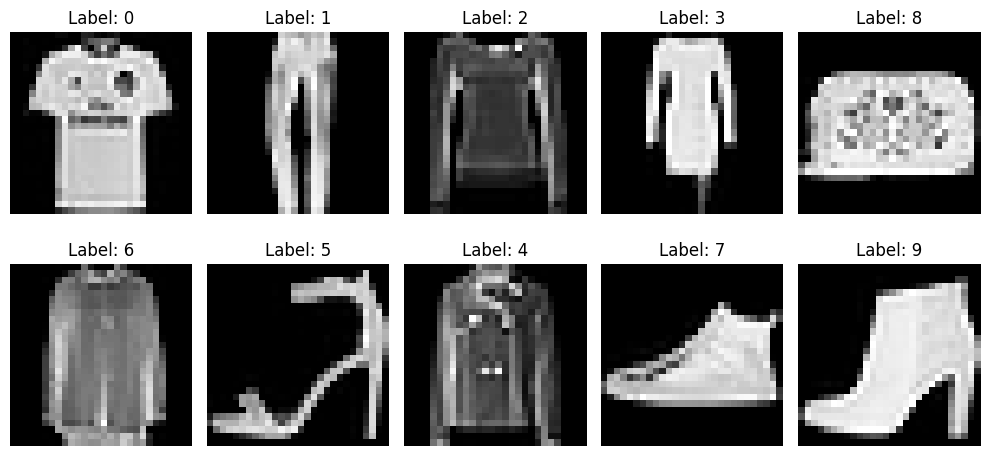

In [5]:
def plot_one_image_per_class(data):
    unique_labels = data['label'].unique()

    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    for i, label in enumerate(unique_labels):
        class_data = data[data['label'] == label].iloc[0, 1:].values

        image = class_data.reshape(28, 28)

        ax = axes[i // 5, i % 5]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_one_image_per_class(train_data)


#### 1.3 Selecting Two Classes
For Binary Classification, we will choose:
  - Class 0: T-shirt
  - Class 1: Trouser/Pants

In [6]:
binary_train_data = train_data[train_data['label'].isin([0, 1])]

binary_test_data = test_data[test_data['label'].isin([0, 1])]

Xb_train = binary_train_data.drop('label', axis=1).values
yb_train = binary_train_data['label'].values

Xb_test = binary_test_data.drop('label', axis=1).values
yb_test = binary_test_data['label'].values

print(f"Binary training set shape: {Xb_train.shape}")
print(f"Binary testing set shape: {Xb_test.shape}")


Binary training set shape: (2000, 784)
Binary testing set shape: (12000, 784)


#### 1.4 Feature Scaling
Below we will apply the feature scaling to standardize the data.

In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
Xb_train = scaler.fit_transform(Xb_train)

# Transform the test data
Xb_test = scaler.transform(Xb_test)


### 2. Algorithms to Use

We will implement the following algorithms:
  - Logistic Regression
  - k-Nearest Neighbors
  - Support Vector Machines
  - Decision Tress

### 3. Hyperparameter Tuning


In this section we will experiment with at least 5 different hyperparameter combinations for each algorithm.

#### 3.1 Logistic Regression

##### 3.1.1 Hyperparamete Combinations

Below is a list of dictionaries containing 5 different combinations of hyperparameters that are going to be used for Logistic Regression.

In [5]:
logreg_params = [
    {'C': 0.01, 'solver': 'liblinear', 'max_iter': 100},
    {'C': 0.1, 'solver': 'liblinear', 'max_iter': 100},
    {'C': 1, 'solver': 'liblinear', 'max_iter': 100},
    {'C': 10, 'solver': 'liblinear', 'max_iter': 100},
    {'C': 1, 'solver': 'lbfgs', 'max_iter': 200},
]


##### 3.1.2 Model training and Evaluation

Below we initilize the model and train and run with the five different sets if hyperparams. We store the results for each for later evaluation.




In [13]:
logreg_results = []

for params in logreg_params:
    # Initialize the model with parameters
    model = LogisticRegression(**params)

    # Train the model
    model.fit(Xb_train, yb_train)

    # Make predictions
    y_pred = model.predict(Xb_test)
    y_prob = model.predict_proba(Xb_test)[:, 1]

    # Evaluate the model
    report = classification_report(yb_test, y_pred, output_dict=True, zero_division=0)
    auc = roc_auc_score(yb_test, y_prob)
    confusion = confusion_matrix(yb_test, y_pred)

    # Store the results
    logreg_results.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC-AUC': auc,
        'Confusion Matrix': confusion
    })

#### 3.2 k-Nearest Neighbors

##### 3.2.1 Hyperparameter Combinations

Below is a list of dictionaries containing 5 different combinations of hyperparameters that are going to be used for k-Nearest Neighbors.

In [7]:
knn_params = [
    {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'euclidean'},
    {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'euclidean'},
    {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'},
    {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan'},
    {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'minkowski'},
]


##### 3.2.2 Model Training and Evaluation

Below we initilize the model and train and run with the five different sets if hyperparams. We store the results for each for later evaluation.

In [14]:
knn_results = []

for params in knn_params:
    # Initialize the model with parameters
    model = KNeighborsClassifier(**params)

    # Train the model
    model.fit(Xb_train, yb_train)

    # Make predictions
    y_pred = model.predict(Xb_test)

    # Evaluate the model
    report = classification_report(yb_test, y_pred, output_dict=True, zero_division=0)
    confusion = confusion_matrix(yb_test, y_pred)

    # Store the results
    knn_results.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC-AUC': 'N/A',
        'Confusion Matrix': confusion
    })


#### 3.3 Support Vector Machines

##### 3.3.1 Hyperparameter Combinations

Below is a list of dictionaries containing 5 different combinations of hyperparameters that are going to be used for Support Vector Machines.

In [16]:
svm_params = [
    {'C': 0.1, 'max_iter': 1000},
    {'C': 1, 'max_iter': 1000},
    {'C': 10, 'max_iter': 1000},
    {'C': 1, 'max_iter': 2000},
    {'C': 1, 'max_iter': 5000},
]

##### 3.3.2 Model Training and Evaluation

Below we initilize the model and train and run with the five different sets if hyperparams. We store the results for each for later evaluation.

In [17]:
svm_results = []

for params in svm_params:
    # Initialize the model with parameters
    model = SVC(**params, probability=True)

    # Train the model
    model.fit(Xb_train, yb_train)

    # Make predictions
    y_pred = model.predict(Xb_test)
    y_prob = model.predict_proba(Xb_test)[:, 1]

    # Evaluate the model
    report = classification_report(yb_test, y_pred, output_dict=True, zero_division=0)
    auc = roc_auc_score(yb_test, y_prob)
    confusion = confusion_matrix(yb_test, y_pred)

    # Store the results
    svm_results.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC-AUC': auc,
        'Confusion Matrix': confusion
    })

#### 3.4 Decision Trees

##### 3.4.1 Hyperparameter Combinations

Below is a list of dictionaries containing 5 different combinations of hyperparameters that are going to be used for Decision Trees.

In [18]:
tree_params = [
    {'max_depth': 5, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 10, 'min_samples_leaf': 2, 'criterion': 'entropy'},
    {'max_depth': None, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 15, 'min_samples_leaf': 4, 'criterion': 'entropy'},
    {'max_depth': 3, 'min_samples_leaf': 2, 'criterion': 'gini'},
]

##### 3.4.2 Model Training and Evaluation

Below we initilize the model and train and run with the five different sets if hyperparams. We store the results for each for later evaluation.

In [19]:
tree_results = []

for params in tree_params:
    # Initialize the model with parameters
    model = DecisionTreeClassifier(**params)

    # Train the model
    model.fit(Xb_train, yb_train)

    # Make predictions
    y_pred = model.predict(Xb_test)
    y_prob = model.predict_proba(Xb_test)[:, 1]

    # Evaluate the model
    report = classification_report(yb_test, y_pred, output_dict=True, zero_division=0)
    auc = roc_auc_score(yb_test, y_prob)
    confusion = confusion_matrix(yb_test, y_pred)

    # Store the results
    tree_results.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC-AUC': auc,
        'Confusion Matrix': confusion
    })


### 4. Performance Evaluation

We will use the following performance metrics:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - Confusion Matrix

#### 4.1 Logistic Regression Results

In this section we output the results from the training in the previous section. However the evaluation is done in section 5 and done more in depth in the report associated with this notebook.

In [20]:
logreg_df = pd.DataFrame(logreg_results)
print("Logistic Regression Results:")
display(logreg_df)

Logistic Regression Results:


,Parameters,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,"{'C': 0.01, 'solver': 'liblinear', 'max_iter':...",0.986250,0.991244,0.981167,0.986180,0.998038,"[[5948, 52], [113, 5887]]"
1,"{'C': 0.1, 'solver': 'liblinear', 'max_iter': ...",0.987333,0.990439,0.984167,0.987293,0.997934,"[[5943, 57], [95, 5905]]"
2,"{'C': 1, 'solver': 'liblinear', 'max_iter': 100}",0.987083,0.989777,0.984333,0.987048,0.997949,"[[5939, 61], [94, 5906]]"
3,"{'C': 10, 'solver': 'liblinear', 'max_iter': 100}",0.986417,0.989107,0.983667,0.986379,0.997732,"[[5935, 65], [98, 5902]]"
4,"{'C': 1, 'solver': 'lbfgs', 'max_iter': 200}",0.987000,0.989611,0.984333,0.986965,0.997674,"[[5938, 62], [94, 5906]]"


#### 4.2 KNN Results

In [21]:
knn_df = pd.DataFrame(knn_results)
print("KNN Results:")
display(knn_df.drop(columns=['Confusion Matrix']))


KNN Results:


,Parameters,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,"{'n_neighbors': 3, 'weights': 'uniform', 'metr...",0.982500,0.988360,0.976500,0.982394,N/A
1,"{'n_neighbors': 5, 'weights': 'uniform', 'metr...",0.983083,0.989860,0.976167,0.982966,N/A
2,"{'n_neighbors': 7, 'weights': 'distance', 'met...",0.984750,0.991052,0.978333,0.984652,N/A
3,"{'n_neighbors': 9, 'weights': 'distance', 'met...",0.985333,0.991394,0.979167,0.985242,N/A
4,"{'n_neighbors': 11, 'weights': 'uniform', 'met...",0.981500,0.991159,0.971667,0.981316,N/A


#### 4.3 SVM Results

In [22]:
svm_df = pd.DataFrame(svm_results)
print("SVM Results:")
display(svm_df.drop(columns=['Confusion Matrix']))


SVM Results:


,Parameters,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,"{'C': 0.1, 'max_iter': 1000}",0.967083,0.996281,0.937667,0.966086,0.996601
1,"{'C': 1, 'max_iter': 1000}",0.983500,0.997257,0.969667,0.983269,0.998582
2,"{'C': 10, 'max_iter': 1000}",0.986833,0.996600,0.977000,0.986703,0.999179
3,"{'C': 1, 'max_iter': 2000}",0.983500,0.997257,0.969667,0.983269,0.998586
4,"{'C': 1, 'max_iter': 5000}",0.983500,0.997257,0.969667,0.983269,0.998593


#### 4.4 Decision Tree Results

In [23]:
tree_df = pd.DataFrame(tree_results)
print("Decision Tree Results:")
display(tree_df.drop(columns=['Confusion Matrix']))


Decision Tree Results:


,Parameters,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,"{'max_depth': 5, 'min_samples_leaf': 1, 'crite...",0.979083,0.980124,0.978000,0.979061,0.978839
1,"{'max_depth': 10, 'min_samples_leaf': 2, 'crit...",0.975500,0.977410,0.973500,0.975451,0.977262
2,"{'max_depth': None, 'min_samples_leaf': 1, 'cr...",0.971167,0.966656,0.976000,0.971305,0.971167
3,"{'max_depth': 15, 'min_samples_leaf': 4, 'crit...",0.976583,0.977778,0.975333,0.976554,0.981368
4,"{'max_depth': 3, 'min_samples_leaf': 2, 'crite...",0.975833,0.982916,0.968500,0.975655,0.982975


### 5. Comparison

Here we compare the performance of all the algorithms and conclude which one performs best for binary classification.*italicized text*

In [24]:
# Combine all results
binary_results = pd.concat([
    logreg_df.assign(Model='Logistic Regression'),
    knn_df.assign(Model='KNN'),
    svm_df.assign(Model='SVM'),
    tree_df.assign(Model='Decision Tree')
], ignore_index=True)

# Rearranging columns for better readability
binary_results = binary_results[['Model', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]

# Display the combined results
print("Combined Binary Classification Results:")
display(binary_results)


Combined Binary Classification Results:


,Model,Parameters,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,"{'C': 0.01, 'solver': 'liblinear', 'max_iter':...",0.986250,0.991244,0.981167,0.986180,0.998038
1,Logistic Regression,"{'C': 0.1, 'solver': 'liblinear', 'max_iter': ...",0.987333,0.990439,0.984167,0.987293,0.997934
2,Logistic Regression,"{'C': 1, 'solver': 'liblinear', 'max_iter': 100}",0.987083,0.989777,0.984333,0.987048,0.997949
3,Logistic Regression,"{'C': 10, 'solver': 'liblinear', 'max_iter': 100}",0.986417,0.989107,0.983667,0.986379,0.997732
4,Logistic Regression,"{'C': 1, 'solver': 'lbfgs', 'max_iter': 200}",0.987000,0.989611,0.984333,0.986965,0.997674
5,KNN,"{'n_neighbors': 3, 'weights': 'uniform', 'metr...",0.982500,0.988360,0.976500,0.982394,N/A
6,KNN,"{'n_neighbors': 5, 'weights': 'uniform', 'metr...",0.983083,0.989860,0.976167,0.982966,N/A
7,KNN,"{'n_neighbors': 7, 'weights': 'distance', 'met...",0.984750,0.991052,0.978333,0.984652,N/A
8,KNN,"{'n_neighbors': 9, 'weights': 'distance', 'met...",0.985333,0.991394,0.979167,0.985242,N/A
9,KNN,"{'n_neighbors': 11, 'weights': 'uniform', 'met...",0.981500,0.991159,0.971667,0.981316,N/A


In the report associated with this notebook there is a much more in depth analysis of the results but here are the key findings for the purpose of the notebook.

- The best Performing Model: Support Vector Machine with parameters {'C': 10, 'max_iter': 1000}.
- Higher regularization (C) values improved SVM performance.
- Logistic Regression also performed exceptionally well with low C values and the liblinear solver.
- KNN's performance was enhanced by using distance weighting and an optimal number of neighbors.
- Decision Trees, while effective, did not achieve the same level of accuracy as SVM or Logistic Regression.

## Part 2: Multi-Class Classification

In this part, we will use the entire Fashion MNIST dataset to classify images into all 10 categories. We will implement and evaluate Logistic Regression, k-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Decision Trees. For each algorithm, we'll experiment with at least 5 different hyperparameter combinations and evaluate their performance using accuracy, precision, recall, F1-score and confusion matrix.

### 1 Dataset Preparation

#### 1.1 Load Data and import Necessary Libraries

All of the imports for the entire notebook are in Part 1 section 1.1 these are in a semi chronological order. I say semi because there is some overlap because of libraries being used in different places. I am going to use the same data import from the same section. The visualiation I did in Part 1 section 1.2 will not be done again here as there is no need to visualize the data twice in the same notebook.

#### 1.2 Seperate Features and Labels

Here we are seperating the data for the multi class classification. Notice I use "Xm" train instead of b like in the previous part since these distinguish the train data and test data for binary and multi.

In [8]:
Xm_train = train_data.drop('label', axis=1).values
ym_train = train_data['label'].values

Xm_test = test_data.drop('label', axis=1).values
ym_test = test_data['label'].values

print(f"Feature training set shape: {Xm_train.shape}")
print(f"Feature testing set shape: {Xm_test.shape}")

Feature training set shape: (10000, 784)
Feature testing set shape: (60000, 784)


#### 1.3 Feature Scaling

In [9]:
# Initialize the scaler
scaler_multi = StandardScaler()

# Fit on training data and transform
Xm_train = scaler_multi.fit_transform(Xm_train)

# Transform the test data
Xm_test = scaler_multi.transform(Xm_test)

### 2. Algorithms to Use

We will implement and evaluate the following algorithms:

- Logistic Regression
- k-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Decision Trees

### 3. Hyperparameter Tuning

#### 3.1 Logistic Regression

##### 3.1.1 Hyperparamete Combinations

In [2]:
logreg_params_multi = [
    {'C': 0.01, 'solver': 'lbfgs', 'max_iter': 100, 'multi_class': 'multinomial'},
    {'C': 0.1, 'solver': 'lbfgs', 'max_iter': 200, 'multi_class': 'multinomial'},
    {'C': 1, 'solver': 'sag', 'max_iter': 100, 'multi_class': 'multinomial'},
    {'C': 10, 'solver': 'saga', 'max_iter': 200, 'multi_class': 'multinomial'},
    {'C': 100, 'solver': 'lbfgs', 'max_iter': 300, 'multi_class': 'multinomial'},
]

##### 3.1.2 Model Training and Evaluation

In [10]:
logreg_results_multi = []

for params in logreg_params_multi:
    # Initialize the model with parameters
    model = LogisticRegression(**params)

    # Train the model
    model.fit(Xm_train, ym_train)

    # Make predictions
    y_pred = model.predict(Xm_test)

    # Evaluate the model
    report = classification_report(ym_test, y_pred, output_dict=True, zero_division=0)
    confusion = confusion_matrix(ym_test, y_pred)

    # Store the results
    logreg_results_multi.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Macro Precision': report['macro avg']['precision'],
        'Macro Recall': report['macro avg']['recall'],
        'Macro F1-Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    })

/Users/domsal/Library/Mobile Documents/com~apple~CloudDocs/School/Fall 2024/Machine Learning/Case Study 1/test/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/domsal/Library/Mobile Documents/com~apple~CloudDocs/School/Fall 2024/Machine Learning/Case Study 1/test/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Use

#### 3.2 k-Nearest Neighbors

##### 3.2.1 Hyperparameter Combinations

In [29]:
knn_params_multi = [
    {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'euclidean'},
    {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'},
    {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'minkowski'},
    {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'},
    {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'manhattan'},
]

##### 3.2.2 Model Training and Evaluation

In [30]:
knn_results_multi = []

for params in knn_params_multi:
    # Initialize the model with parameters
    model = KNeighborsClassifier(**params)

    # Train the model
    model.fit(Xm_train, ym_train)

    # Make predictions
    y_pred = model.predict(Xm_test)

    # Evaluate the model
    report = classification_report(ym_test, y_pred, output_dict=True, zero_division=0)
    confusion = confusion_matrix(ym_test, y_pred)

    # Store the results
    knn_results_multi.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Macro Precision': report['macro avg']['precision'],
        'Macro Recall': report['macro avg']['recall'],
        'Macro F1-Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    })

#### 3.3 Support Vector Machines

##### 3.3.1 Hyperparameter Combinations

In [31]:
svm_params_multi = [
    {'C': 0.01, 'max_iter': 1000},
    {'C': 0.1, 'max_iter': 1000},
    {'C': 1, 'max_iter': 2000},
    {'C': 10, 'max_iter': 3000},
    {'C': 100, 'max_iter': 5000},
]

##### 3.3.2 Model Training and Evaluation

In [38]:
svm_results_multi = []

for params in svm_params_multi:
    # Initialize the model with parameters
    model = LinearSVC(**params)

    # Train the model
    model.fit(Xm_train, ym_train)

    # Make predictions
    y_pred = model.predict(Xm_test)

    # Evaluate the model
    report = classification_report(ym_test, y_pred, output_dict=True, zero_division=0)
    confusion = confusion_matrix(ym_test, y_pred)

    # Store the results
    svm_results_multi.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Macro Precision': report['macro avg']['precision'],
        'Macro Recall': report['macro avg']['recall'],
        'Macro F1-Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    })

/Users/domsal/Library/Mobile Documents/com~apple~CloudDocs/School/Fall 2024/Machine Learning/Case Study 1/test/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/domsal/Library/Mobile Documents/com~apple~CloudDocs/School/Fall 2024/Machine Learning/Case Study 1/test/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/domsal/Library/Mobile Documents/com~apple~CloudDocs/School/Fall 2024/Machine Learning/Case Study 1/test/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 3.4 Decision Trees

3.4.1 Hyperparameter Combinations

In [32]:
tree_params_multi = [
    {'max_depth': 10, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 20, 'min_samples_leaf': 2, 'criterion': 'entropy'},
    {'max_depth': None, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 15, 'min_samples_leaf': 4, 'criterion': 'entropy'},
    {'max_depth': 5, 'min_samples_leaf': 2, 'criterion': 'gini'},
]

##### 3.4.2 Model Training and Evaluation

In [33]:
tree_results_multi = []

for params in tree_params_multi:
    # Initialize the model with parameters
    model = DecisionTreeClassifier(**params)

    # Train the model
    model.fit(Xm_train, ym_train)

    # Make predictions
    y_pred = model.predict(Xm_test)

    # Evaluate the model
    report = classification_report(ym_test, y_pred, output_dict=True, zero_division=0)
    confusion = confusion_matrix(ym_test, y_pred)

    # Store the results
    tree_results_multi.append({
        'Parameters': params,
        'Accuracy': report['accuracy'],
        'Macro Precision': report['macro avg']['precision'],
        'Macro Recall': report['macro avg']['recall'],
        'Macro F1-Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    })


### 4. Performance Evaluation

We will use the following performance metrics for multi-class classification:

- Accuracy
- Macro Precision
- Macro Recall
- Macro F1-Score
- Confusion Matrix


#### 4.1 Logistic Regression Results

In [11]:
logreg_multi_df = pd.DataFrame(logreg_results_multi)
print("Logistic Regression Results (Multi-Class):")
display(logreg_multi_df.drop(columns=['Confusion Matrix']))

Logistic Regression Results (Multi-Class):


,Parameters,Accuracy,Macro Precision,Macro Recall,Macro F1-Score
0,"{'C': 0.01, 'solver': 'lbfgs', 'max_iter': 100...",0.843717,0.843158,0.843717,0.843255
1,"{'C': 0.1, 'solver': 'lbfgs', 'max_iter': 200,...",0.830683,0.830514,0.830683,0.830457
2,"{'C': 1, 'solver': 'sag', 'max_iter': 100, 'mu...",0.843817,0.843126,0.843817,0.843286
3,"{'C': 10, 'solver': 'saga', 'max_iter': 200, '...",0.843817,0.843167,0.843817,0.843306
4,"{'C': 100, 'solver': 'lbfgs', 'max_iter': 300,...",0.783133,0.784607,0.783133,0.783690


#### 4.2 KNN Results

In [35]:
knn_multi_df = pd.DataFrame(knn_results_multi)
print("KNN Results (Multi-Class):")
display(knn_multi_df.drop(columns=['Confusion Matrix']))

KNN Results (Multi-Class):


,Parameters,Accuracy,Macro Precision,Macro Recall,Macro F1-Score
0,"{'n_neighbors': 3, 'weights': 'uniform', 'metr...",0.815233,0.822266,0.815233,0.815827
1,"{'n_neighbors': 5, 'weights': 'distance', 'met...",0.828583,0.832798,0.828583,0.829244
2,"{'n_neighbors': 7, 'weights': 'uniform', 'metr...",0.818150,0.825218,0.818150,0.818545
3,"{'n_neighbors': 9, 'weights': 'distance', 'met...",0.818317,0.826235,0.818317,0.819210
4,"{'n_neighbors': 11, 'weights': 'uniform', 'met...",0.825100,0.828647,0.825100,0.824620


#### 4.3 SVM Results

In [39]:
svm_multi_df = pd.DataFrame(svm_results_multi)
print("SVM Results (Multi-Class):")
display(svm_multi_df.drop(columns=['Confusion Matrix']))

SVM Results (Multi-Class):


,Parameters,Accuracy,Macro Precision,Macro Recall,Macro F1-Score
0,"{'C': 0.01, 'max_iter': 1000}",0.827483,0.825317,0.827483,0.825653
1,"{'C': 0.1, 'max_iter': 1000}",0.807517,0.805533,0.807517,0.805976
2,"{'C': 1, 'max_iter': 2000}",0.785167,0.782713,0.785167,0.783442
3,"{'C': 10, 'max_iter': 3000}",0.772683,0.770555,0.772683,0.771130
4,"{'C': 100, 'max_iter': 5000}",0.767033,0.765248,0.767033,0.765597


#### 4.4 Decision Tree Results

In [37]:
tree_multi_df = pd.DataFrame(tree_results_multi)
print("Decision Tree Results (Multi-Class):")
display(tree_multi_df.drop(columns=['Confusion Matrix']))

Decision Tree Results (Multi-Class):


,Parameters,Accuracy,Macro Precision,Macro Recall,Macro F1-Score
0,"{'max_depth': 10, 'min_samples_leaf': 1, 'crit...",0.774967,0.780308,0.774967,0.776663
1,"{'max_depth': 20, 'min_samples_leaf': 2, 'crit...",0.763333,0.764200,0.763333,0.763398
2,"{'max_depth': None, 'min_samples_leaf': 1, 'cr...",0.753600,0.755018,0.753600,0.754239
3,"{'max_depth': 15, 'min_samples_leaf': 4, 'crit...",0.767583,0.769620,0.767583,0.768330
4,"{'max_depth': 5, 'min_samples_leaf': 2, 'crite...",0.694317,0.718581,0.694317,0.681496


### 5. Comparison

Here we compare the performance of all the algorithms and conclude which one performs best for multi class classification.

In [40]:
multi_results = pd.concat([
    logreg_multi_df.assign(Model='Logistic Regression'),
    knn_multi_df.assign(Model='KNN'),
    svm_multi_df.assign(Model='SVM'),
    tree_multi_df.assign(Model='Decision Tree')
], ignore_index=True)

# Rearranging columns for better readability
multi_results = multi_results[['Model', 'Parameters', 'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-Score']]

# Display the combined results
print("Combined Multi-Class Classification Results:")
display(multi_results)

Combined Multi-Class Classification Results:


,Model,Parameters,Accuracy,Macro Precision,Macro Recall,Macro F1-Score
0,Logistic Regression,"{'C': 0.01, 'solver': 'lbfgs', 'max_iter': 100...",0.843717,0.843158,0.843717,0.843255
1,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs', 'max_iter': 200,...",0.830683,0.830514,0.830683,0.830457
2,Logistic Regression,"{'C': 1, 'solver': 'sag', 'max_iter': 100, 'mu...",0.843833,0.843182,0.843833,0.843322
3,Logistic Regression,"{'C': 10, 'solver': 'saga', 'max_iter': 200, '...",0.843850,0.843195,0.843850,0.843337
4,Logistic Regression,"{'C': 100, 'solver': 'lbfgs', 'max_iter': 300,...",0.783133,0.784607,0.783133,0.783690
5,KNN,"{'n_neighbors': 3, 'weights': 'uniform', 'metr...",0.815233,0.822266,0.815233,0.815827
6,KNN,"{'n_neighbors': 5, 'weights': 'distance', 'met...",0.828583,0.832798,0.828583,0.829244
7,KNN,"{'n_neighbors': 7, 'weights': 'uniform', 'metr...",0.818150,0.825218,0.818150,0.818545
8,KNN,"{'n_neighbors': 9, 'weights': 'distance', 'met...",0.818317,0.826235,0.818317,0.819210
9,KNN,"{'n_neighbors': 11, 'weights': 'uniform', 'met...",0.825100,0.828647,0.825100,0.824620


In the report associated with this notebook there is a much more in depth analysis of the results but here are the key findings for the purpose of the notebook.

- Logistic Regression is the preferred model for multi-class classification on this dataset, achieving the highest accuracy and balanced performance across precision, recall, and F1-score.
- KNN is a viable alternative, especially with:
    - n_neighbors=5
    - weights='distance'
    - metric='manhattan'  